In [69]:
import pandas as pd

# Load CSV
file_path = "DA -Task 2.csv" 
df = pd.read_csv(file_path)

#display 
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,01-02-2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,01-03-2024,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,01-04-2024,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,01-04-2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,01-05-2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [12]:
print("Rows, Columns:", df.shape)

df.info()

df.isnull().sum().sort_values(ascending=False)

Rows, Columns: (100, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VIN                            100 non-null    object 
 1   TRANSACTION_ID                 100 non-null    int64  
 2   CORRECTION_VERBATIM            100 non-null    object 
 3   CUSTOMER_VERBATIM              100 non-null    object 
 4   REPAIR_DATE                    100 non-null    object 
 5   CAUSAL_PART_NM                 95 non-null     object 
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object 
 7   PLATFORM                       100 non-null    object 
 8   BODY_STYLE                     100 non-null    object 
 9   VPPC                           100 non-null    object 
 10  PLANT                          99 non-null     object 
 11  BUILD_COUNTRY                  100 non-null    object 
 12  LAST_KNOWN_DLR_NAME       

CAMPAIGN_NBR                     100
ENGINE_TRACE_NBR                  12
TRANSMISSION_TRACE_NBR            12
ENGINE_SOURCE_PLANT               12
TRANSMISSION_SOURCE_PLANT         12
OPTN_FAMLY_CERTIFICATION          10
TOTALCOST                          6
OPTF_FAMLY_EMISSIOF_SYSTEM         5
CAUSAL_PART_NM                     5
LAST_KNOWN_DELVRY_TYPE_CD          2
VEH_TEST_GRP                       2
STATE                              2
REPAIR_DLR_POSTAL_CD               2
PLANT                              1
LINE_SERIES                        1
TRANSACTION_CNTR                   0
ENGINE                             0
NON_CAUSAL_PART_QTY                0
REPORTING_COST                     0
LBRCOST                            0
TRANSMISSION                       0
ENGINE_DESC                        0
SRC_VER_NBR                        0
TRANSMISSION_DESC                  0
TRANSACTION_CATEGORY               0
VIN_MODL_DESGTR                    0
MEDIA_FLAG                         0
S

In [14]:
# Convert REPAIR_DATE column to datetime format
df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'], errors='coerce')

# Check if the conversion worked
df['REPAIR_DATE'].head()

0   2024-01-02
1   2024-01-03
2   2024-01-04
3   2024-01-04
4   2024-01-05
Name: REPAIR_DATE, dtype: datetime64[ns]

In [16]:
text_columns = ['STATE', 'PLATFORM', 'BODY_STYLE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION']

for col in text_columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Check sample cleaned value
df[text_columns].head()


,STATE,PLATFORM,BODY_STYLE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION
0,mi,full-size trucks,crew cab,wheel asm-strg *jet black,steering wheel replacement
1,mn,full-size trucks,crew cab,module asm-strg whl ht cont,heated steering wheel module replacement
2,ca,bev,4 door utility,wheel asm-strg *backen blackk,steering wheel replacement
3,wi,full-size trucks,crew cab,wheel asm-strg *jet black,steering wheel replacement
4,wa,full-size trucks,crew cab,wheel asm-strg *jet black,steering wheel replacement


In [18]:
# Fill missing values
df['CAUSAL_PART_NM'] = df['CAUSAL_PART_NM'].fillna('unknown')
df['PLANT'] = df['PLANT'].fillna('unknown')
df['STATE'] = df['STATE'].fillna('unknown')

# Drop column if it exists
if 'CAMPAIGN_NBR' in df.columns:
    df = df.drop(columns=['CAMPAIGN_NBR'])


In [20]:
# Check missing values again to confirm
df.isnull().sum().sort_values(ascending=False)

ENGINE_SOURCE_PLANT              12
TRANSMISSION_TRACE_NBR           12
ENGINE_TRACE_NBR                 12
TRANSMISSION_SOURCE_PLANT        12
OPTN_FAMLY_CERTIFICATION         10
TOTALCOST                         6
OPTF_FAMLY_EMISSIOF_SYSTEM        5
VEH_TEST_GRP                      2
LAST_KNOWN_DELVRY_TYPE_CD         2
REPAIR_DLR_POSTAL_CD              2
LINE_SERIES                       1
TRANSACTION_CNTR                  0
LBRCOST                           0
GLOBAL_LABOR_CODE                 0
TRANSACTION_CATEGORY              0
REPORTING_COST                    0
NON_CAUSAL_PART_QTY               0
ENGINE_DESC                       0
ENGINE                            0
SRC_VER_NBR                       0
TRANSMISSION                      0
TRANSMISSION_DESC                 0
VIN_MODL_DESGTR                   0
MEDIA_FLAG                        0
SRC_TXN_ID                        0
VIN                               0
COUNTRY_SALE_ISO                  0
ORD_SELLING_SRC_CD          

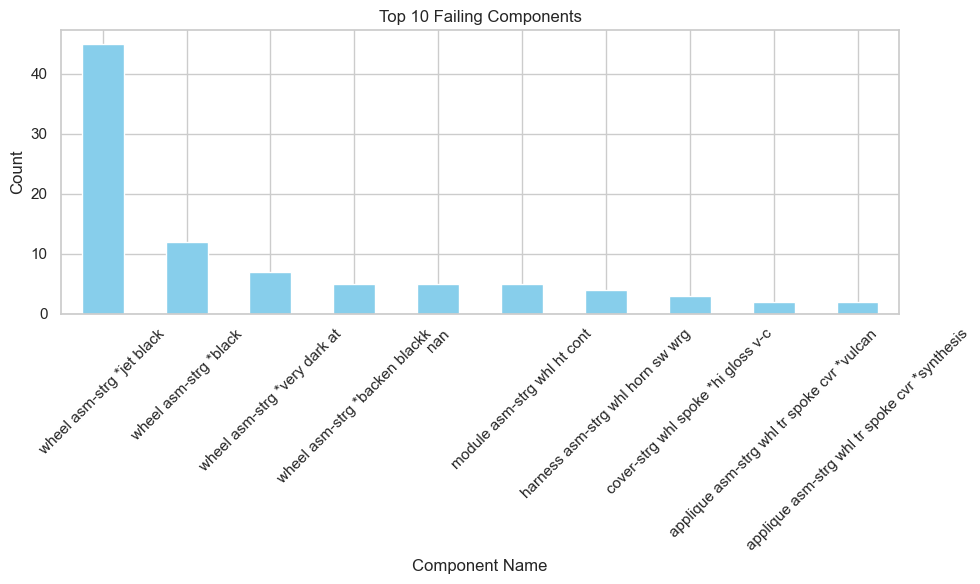

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# style
sns.set(style="whitegrid")

# Top 10 causal parts
plt.figure(figsize=(10, 6))
df['CAUSAL_PART_NM'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Failing Components")
plt.xlabel("Component Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

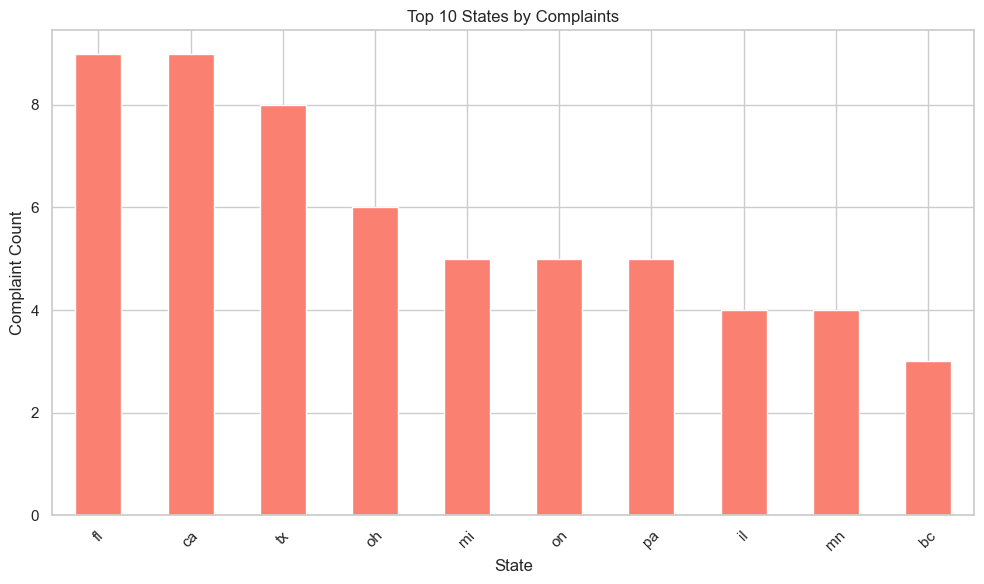

In [23]:
plt.figure(figsize=(10, 6))
df['STATE'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title("Top 10 States by Complaints")
plt.xlabel("State")
plt.ylabel("Complaint Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

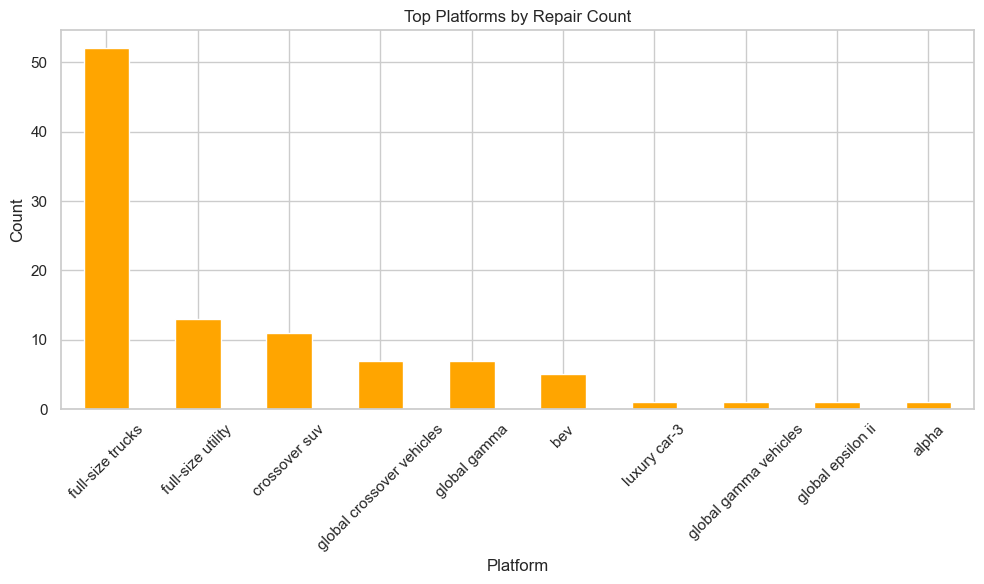

In [24]:
plt.figure(figsize=(10, 6))
df['PLATFORM'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top Platforms by Repair Count")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
# tag extraction
def generate_tags(text):
    text = str(text).lower()

    tags = []

    if 'engine' in text:
        tags.append('engine')
    if 'transmission' in text:
        tags.append('transmission')
    if 'brake' in text:
        tags.append('brake')
    if 'battery' in text:
        tags.append('battery')
    if 'noise' in text or 'sound' in text:
        tags.append('noise issue')
    if 'vibration' in text:
        tags.append('vibration')
    if 'leak' in text:
        tags.append('leak')
    if 'sensor' in text:
        tags.append('sensor')
    if 'replace' in text:
        tags.append('replacement')
    if 'fail' in text or 'not working' in text:
        tags.append('failure')

    return ', '.join(tags) if tags else 'other'


In [65]:
# Apply tag function
df['TECHNICIAN_TAGS'] = df['CORRECTION_VERBATIM'].apply(generate_tags)
df['CUSTOMER_TAGS'] = df['CUSTOMER_VERBATIM'].apply(generate_tags)

# Check a sample
df[['CORRECTION_VERBATIM', 'TECHNICIAN_TAGS', 'CUSTOMER_TAGS']].head(10)


,CORRECTION_VERBATIM,TECHNICIAN_TAGS,CUSTOMER_TAGS
0,REPLACED STEERING WHEEL NOW OKAY,replacement,other
1,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,replacement,other
2,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,replacement,other
3,STEERING WHEEL REPLACEMENT,replacement,other
4,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,replacement,other
5,Remove and replace steering wheel wire harness,replacement,other
6,"ACCESSED, REMOVED AND REPLACED THE DRIVERS ASS...",replacement,other
7,REPLACED STEERING WHEEL,replacement,failure
8,TECHNICIAN FOUND THE STEERING COLUMN PLASTIC T...,other,noise issue
9,Steering Wheel Replacement,replacement,other


In [34]:
# View tag distribution
df['TECHNICIAN_TAGS'].value_counts().head(10)

TECHNICIAN_TAGS
replacement             81
other                   14
replacement, failure     3
battery                  1
noise issue              1
Name: count, dtype: int64

In [36]:
# Export 
df.to_csv("Cleaned_DA_Task_2.csv", index=False)